<a href="https://colab.research.google.com/github/stevec12/ETFs-Analysis/blob/main/ETF_Data_Prep_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## ETF Data Analysis

We try to look for some interesting patterns in ETFs.

Dataset from: https://www.kaggle.com/datasets/andrezaza/large-etfs-with-size-allocations-and-exposures?resource=download 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Remark: Normally we would split the data into training and testing sets, but here we would like to have more data avaible for the feature selection.

Additionally, we don't yet have a feature of interest - the response variable. Here we look through the data a bit first and see if any of the features seem interesting.

In [2]:
etfs = pd.read_csv('justetf.csv')
print(etfs.shape)
etfs_nrow = etfs.shape[0]
etfs.describe()

(2264, 129)


quote52Low  quote52High  ytdReturnCUR          ter  \
count  2264.000000  2264.000000   2233.000000  2264.000000   
mean     55.540287    69.085327      0.038858     0.003261   
std      83.898861   104.116068      0.115888     0.003124   
min       0.000000     0.520000     -0.220200     0.000000   
25%       9.117500    11.400000      0.000000     0.001500   
50%      24.430000    30.740000      0.023300     0.002500   
75%      67.442500    81.460000      0.045200     0.004000   
max     911.170000   965.820000      1.463800     0.025000   

       fiveYearVolatilityCUR  fiveYearReturnPerRiskCUR  yearVolatilityCUR  \
count            1243.000000               1243.000000        2038.000000   
mean                0.171964                  0.175221           0.202521   
std                 0.077558                  0.446458           0.139827   
min                 0.000800                 -5.120000           0.001100   
25%                 0.125450                  0.000000           0.138300   
50%                 0.182500                  0.250000           0.184900   
75%                 0.215400                  0.430000           0.235900   
max                 0.675000                  0.890000           1.994800   

       yearDividendYield  threeMonthReturnCUR  monthReturnCUR  ...  \
count         781.000000          2229.000000     2251.000000  ...   
mean            0.023906             0.032494       -0.033368  ...   
std             0.016792             0.093691        0.045044  ...   
min             0.000000            -0.200400       -0.291000  ...   
25%             0.012600            -0.001500       -0.057500  ...   
50%             0.020400             0.016000       -0.036200  ...   
75%             0.030800             0.042600       -0.001400  ...   
max             0.133600             0.908500        0.117200  ...   

       exposureCountry_Argentina  exposureCountry_Macedonia  \
count                2264.000000                2264.000000   
mean                    0.000019                   0.000442   
std                     0.000654                   0.021017   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     0.022000                   1.000000   

       exposureCountry_Peru  exposureCountry_Russia  exposureCountry_Cyprus  \
count           2264.000000             2264.000000             2264.000000   
mean               0.000015                0.000328                0.000009   
std                0.000495                0.015609                0.000433   
min                0.000000                0.000000                0.000000   
25%                0.000000                0.000000                0.000000   
50%                0.000000                0.000000                0.000000   
75%                0.000000                0.000000                0.000000   
max                0.016900                0.742700                0.020600   

       exposureCountry_Colombia  exposureCountry_Czech Republic  \
count               2264.000000                     2264.000000   
mean                   0.000087                        0.000273   
std                    0.002915                        0.012971   
min                    0.000000                        0.000000   
25%                    0.000000                        0.000000   
50%                    0.000000                        0.000000   
75%                    0.000000                        0.000000   
max                    0.098100                        0.617200   

       exposureCountry_Slovakia  exposureCountry_Slovenia  \
count               2264.000000               2264.000000   
mean                   0.000526                  0.000442   
std                    0.021392                  0.021017

The dataset contains 2264 ETFs and 129 characteristics.

We take a look at all our characteristics:

In [3]:
for i in range(0,len(etfs.columns)):
  print(f"{etfs.columns[i]},",end='')
  if ((i+1)%10 == 0):
    print('')

isin,wkn,name,fundProvider,legalStructure,quote,quote52Low,quote52High,ytdReturnCUR,ter,
fiveYearVolatilityCUR,fiveYearReturnPerRiskCUR,yearVolatilityCUR,distributionPolicy,fundCurrency,yearDividendYield,threeMonthReturnCUR,monthReturnCUR,sixMonthReturnCUR,inceptionDate,
threeYearVolatilityCUR,yearReturnPerRiskCUR,yearReturn2CUR,yearReturn4CUR,replicationMethod,hasSecuritiesLending,ticker,yearReturnCUR,threeYearReturnPerRiskCUR,domicileCountry,
threeYearReturnCUR,valorNumber,currentDividendYield,yearReturn3CUR,fiveYearReturnCUR,weekReturnCUR,yearReturn1CUR,quoteMarket,quoteDate,labels,
replicationStrategy,fundStructure,distributionFrequency,currencyRisk,fiscalYearEnd,UCITSCompliance,revisionCompany,indexType,securitiesLending,top10Holdings,
exposureCountry_Netherlands,exposureCountry_United Kingdom,exposureCountry_Luxembourg,exposureCountry_Other,exposureSector_Technology,exposureSector_Consumer Staples,exposureSector_Industrials,exposureSector_Consumer Discretionary,exposureSector_Oth

Put in table to be a little prettier.

In [5]:
charxs = etfs.columns.values
num_charxs = len(charxs)
charxs_fmtd = [list(charxs[i*5:i*5+5]) for i in range(0,num_charxs//5) if i*5<num_charxs]

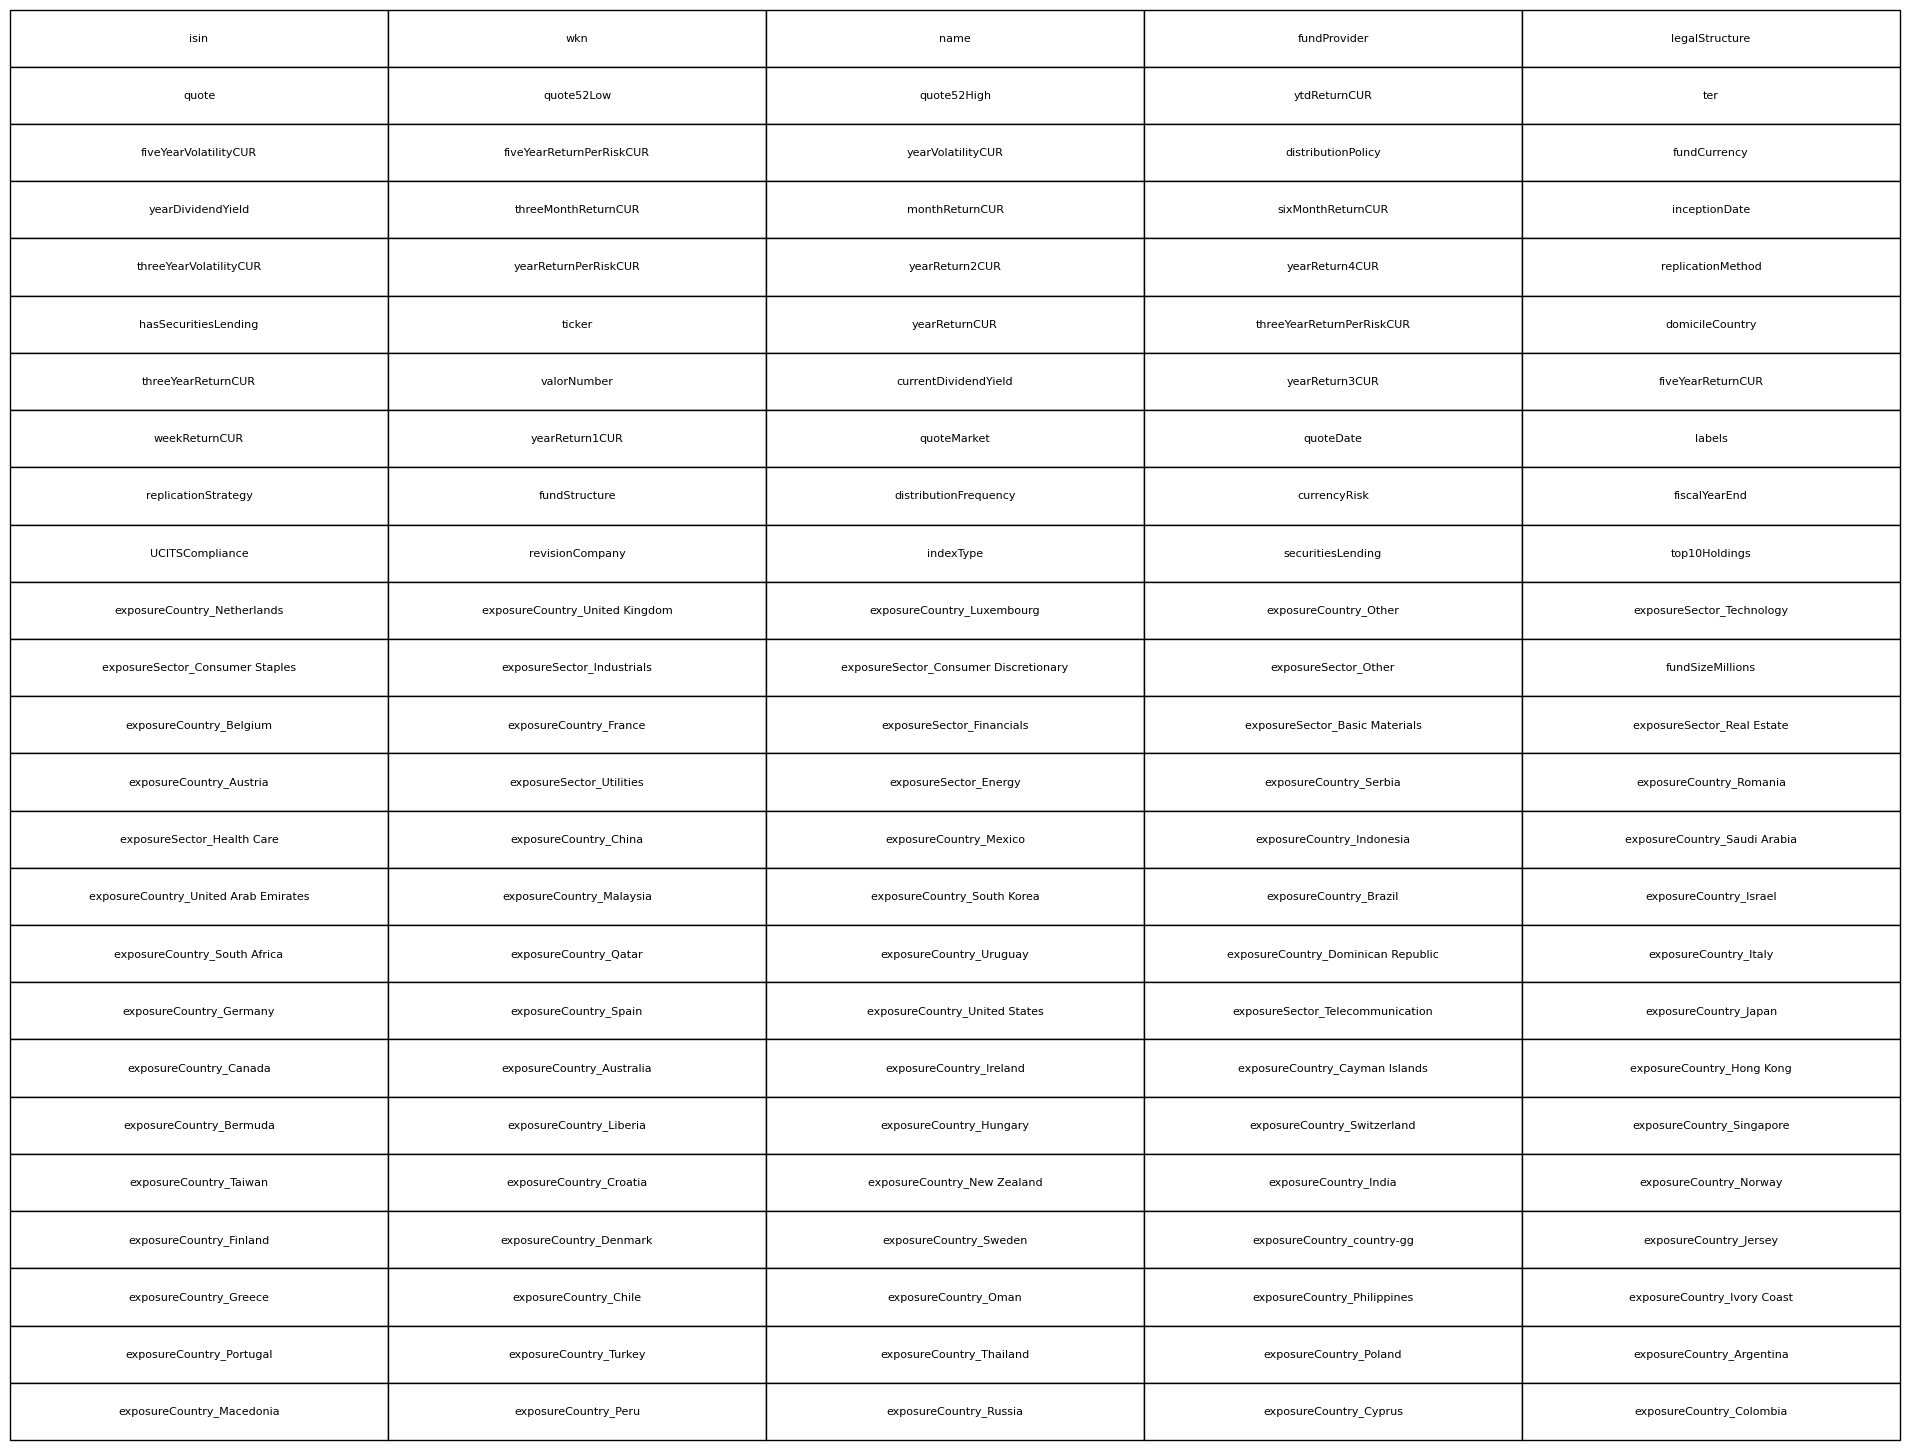

In [6]:
fig, ax = plt.subplots()
ax.table(charxs_fmtd,cellLoc='center',loc='center',fontsize=24)
ax.axis('tight')
ax.axis('off')
fig.set_size_inches(19.2,14.4)
fig.tight_layout()
plt.show()

## Data Preparation and Feature Selection
We ponder whether exposure to any and every country is relavent. We remove these features to simplify the dataset.

We see that the first 50 characteristics are not exposures, and being trying to with trying to vizualize these.

Of the remaining 50, we remove relatively facetious characteristics: 1,2,3,27,32,38,39,45,47

And removing more complex characteristics: 25,30,40,41,42,48,50

We factorize the remainder. 

In [7]:
char_indxs = [i for i in range(0,50) if i not in [0,1,2,24,26,29,31,37,38,39,40,41,44,46,47,49]]
etfs_trim = etfs.iloc[:,char_indxs]
etfs_trim.dtypes

fundProvider                  object
legalStructure                object
quote                         object
quote52Low                   float64
quote52High                  float64
ytdReturnCUR                 float64
ter                          float64
fiveYearVolatilityCUR        float64
fiveYearReturnPerRiskCUR     float64
yearVolatilityCUR            float64
distributionPolicy            object
fundCurrency                  object
yearDividendYield            float64
threeMonthReturnCUR          float64
monthReturnCUR               float64
sixMonthReturnCUR            float64
inceptionDate                 object
threeYearVolatilityCUR       float64
yearReturnPerRiskCUR         float64
yearReturn2CUR               float64
yearReturn4CUR               float64
hasSecuritiesLending          object
yearReturnCUR                float64
threeYearReturnPerRiskCUR    float64
threeYearReturnCUR           float64
currentDividendYield         float64
yearReturn3CUR               float64
f

We see that `quote` is an `object` rather than `float64`, so we change this as well as factorizing the other `object` dtypes.

In [8]:
# Fails with value '4,907.94'
# etfs_trim['quote']=etfs_trim['quote'].astype('float64')

# Get indices using ','
comma_indxs = [i for i in range(0,len(etfs_trim['quote'])) if ',' in etfs_trim['quote'][i]]

# replace ',' with nothing ''
for i in comma_indxs:
  etfs_trim.loc[i,'quote'] = etfs_trim.loc[i, 'quote'].replace(',','')

# Now set 'quote' as float64 dtype
etfs_trim['quote'] = pd.to_numeric(etfs_trim['quote'])

<ipython-input-8-58935ac3db72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etfs_trim['quote'] = pd.to_numeric(etfs_trim['quote'])


In [9]:
# Factorize remaining objects
etfs_trim.loc[:,etfs_trim.dtypes == 'object'] = etfs_trim.loc[:,etfs_trim.dtypes == 'object'].apply(lambda x: pd.factorize(x)[0])

<ipython-input-9-0132fa8642f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etfs_trim.loc[:,etfs_trim.dtypes == 'object'] = etfs_trim.loc[:,etfs_trim.dtypes == 'object'].apply(lambda x: pd.factorize(x)[0])


## Missing Data

We look at categories which are missing entires.

We form an aribitrary cutoff at >1/3 missing entries. However, a statistically driven cutoff could be formed by selecting a desired confidence level and feature distribution and solving.

In [10]:
tol = etfs_nrow/3
etfs_trim = etfs_trim.loc[:, etfs_trim.isna().sum() < etfs_nrow/3]

## Variance Testing
Firstly, we remove low variance features.

In [11]:
# Set variance tolerance of 0.01
tol = 0.01
etfs_trim = etfs_trim.loc[:,etfs_trim.var()>tol]
etfs_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fundProvider               2264 non-null   int64  
 1   legalStructure             2264 non-null   int64  
 2   quote                      2264 non-null   float64
 3   quote52Low                 2264 non-null   float64
 4   quote52High                2264 non-null   float64
 5   ytdReturnCUR               2233 non-null   float64
 6   yearVolatilityCUR          2038 non-null   float64
 7   distributionPolicy         2264 non-null   int64  
 8   fundCurrency               2264 non-null   int64  
 9   inceptionDate              2264 non-null   int64  
 10  yearReturnPerRiskCUR       2038 non-null   float64
 11  yearReturn2CUR             1768 non-null   float64
 12  hasSecuritiesLending       2264 non-null   int64  
 13  yearReturnCUR              2036 non-null   float

However, we are also interested in `ter`, the fees paid for a ETF, so we add this feature back.

In [12]:
etfs_trim['ter']=etfs['ter']

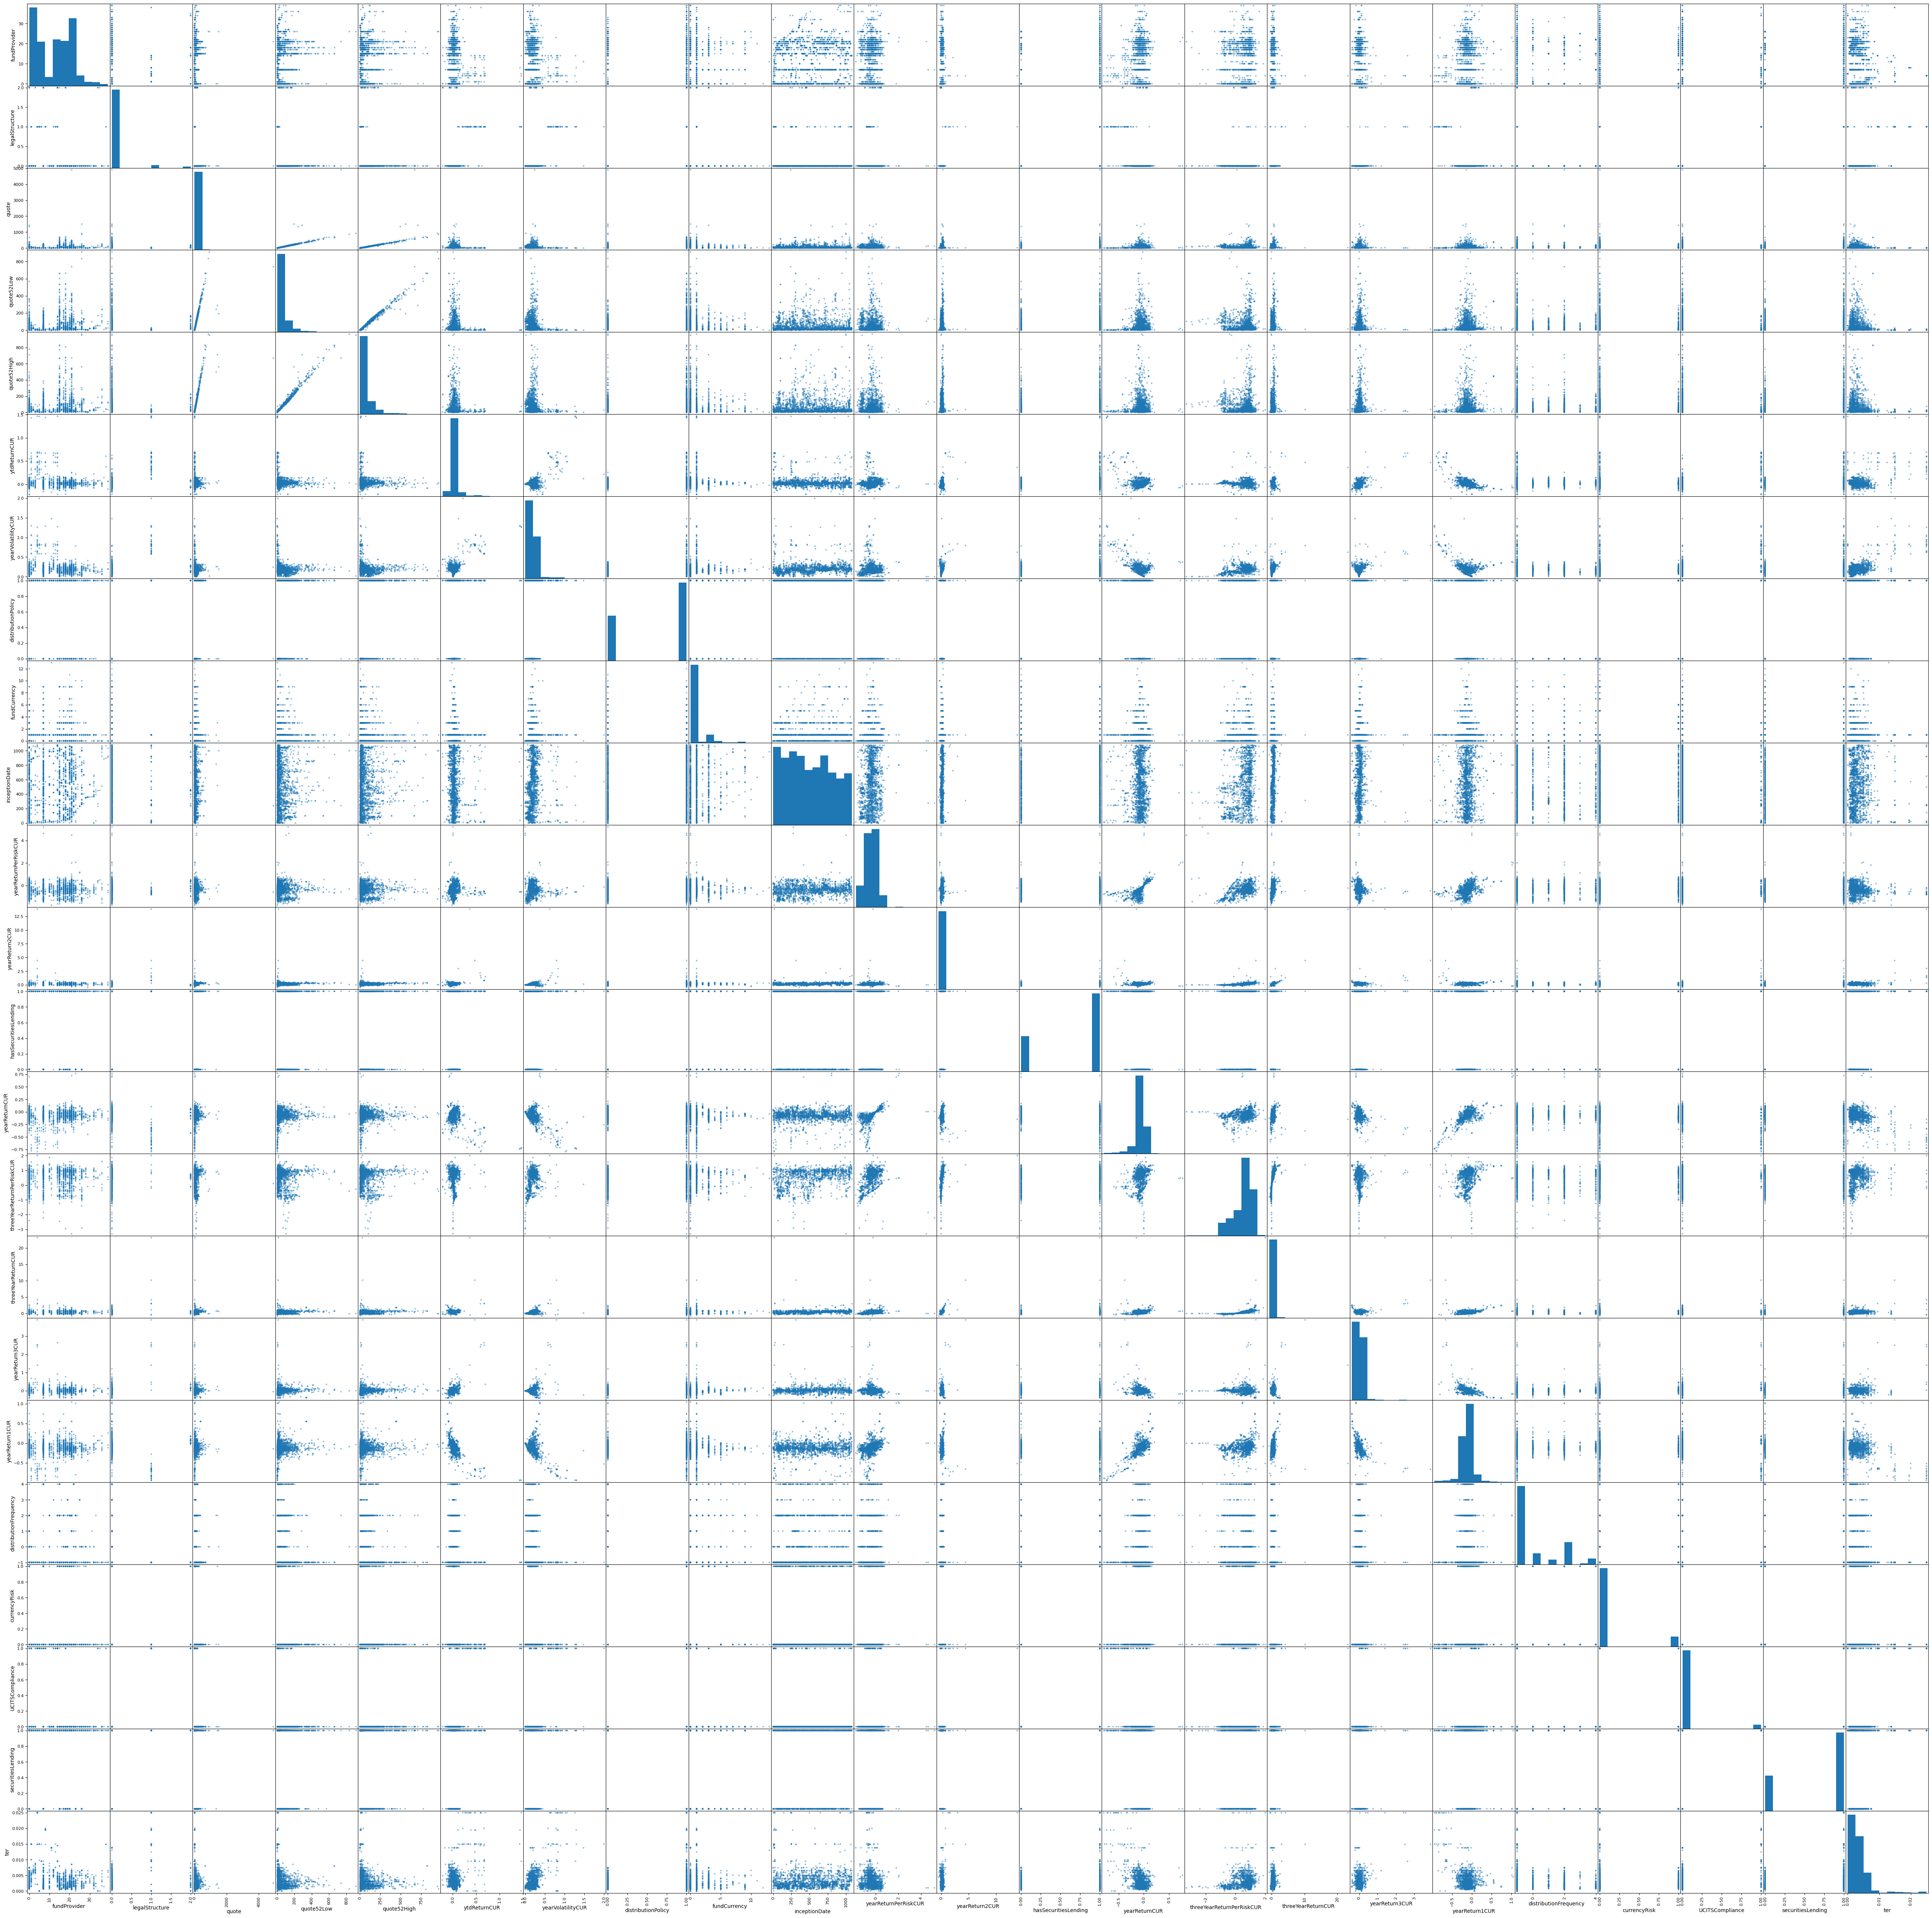

In [133]:
pd.plotting.scatter_matrix(etfs_trim, figsize=(66,66));

## Covariance Testing
Then we look for highly correlated features, and determine whether to remove them.

In [13]:
etfs_corr = etfs_trim.corr(); etfs_corr

fundProvider  legalStructure     quote  quote52Low  \
fundProvider                   1.000000       -0.069302  0.105552    0.150563   
legalStructure                -0.069302        1.000000 -0.029296   -0.042718   
quote                          0.105552       -0.029296  1.000000    0.756568   
quote52Low                     0.150563       -0.042718  0.756568    1.000000   
quote52High                    0.146564       -0.030081  0.752581    0.988204   
ytdReturnCUR                  -0.067956        0.404212 -0.053628   -0.077504   
yearVolatilityCUR             -0.087718        0.409410 -0.056795   -0.116306   
distributionPolicy             0.024267        0.163459  0.012468    0.060151   
fundCurrency                  -0.065410        0.015654 -0.079891   -0.109469   
inceptionDate                  0.066161       -0.049619  0.014769    0.018624   
yearReturnPerRiskCUR           0.001057        0.050719  0.016982    0.007830   
yearReturn2CUR                -0.024600        0.074320  0.012716    0.001801   
hasSecuritiesLending           0.305514        0.144448  0.021480    0.015339   
yearReturnCUR                  0.082417       -0.265980  0.103300    0.105366   
threeYearReturnPerRiskCUR      0.026517        0.010150  0.005367   -0.007939   
threeYearReturnCUR            -0.008175        0.126697  0.028504    0.011836   
yearReturn3CUR                -0.045854        0.269617 -0.007012   -0.012404   
yearReturn1CUR                 0.047688       -0.123023  0.045623    0.088496   
distributionFrequency         -0.062123       -0.141310 -0.011051   -0.051889   
currencyRisk                  -0.044855        0.003791 -0.046733   -0.076251   
UCITSCompliance               -0.095542        0.940079 -0.050389   -0.076309   
securitiesLending              0.305514        0.144448  0.021480    0.015339   
ter                           -0.151508        0.390397 -0.085886   -0.126037   

                           quote52High  ytdReturnCUR  yearVolatilityCUR  \
fundProvider                  0.146564     -0.067956          -0.087718   
legalStructure               -0.030081      0.404212           0.409410   
quote                         0.752581     -0.053628          -0.056795   
quote52Low                    0.988204     -0.077504          -0.116306   
quote52High                   1.000000     -0.055140          -0.074315   
ytdReturnCUR                 -0.055140      1.000000           0.652474   
yearVolatilityCUR            -0.074315      0.652474           1.000000   
distributionPolicy            0.065264      0.101705           0.207394   
fundCurrency                 -0.107848     -0.047421           0.028088   
inceptionDate                 0.027450     -0.060856           0.100514   
yearReturnPerRiskCUR          0.008258      0.025488           0.036026   
yearReturn2CUR                0.013059      0.283650           0.362535   
hasSecuritiesLending          0.021929      0.105656           0.121154   
yearReturnCUR                 0.077891     -0.443765          -0.593266   
threeYearReturnPerRiskCUR     0.013242      0.027776           0.339245   
threeYearReturnCUR            0.028227      0.256988           0.407496   
yearReturn3CUR                0.001940      0.593260           0.356808   
yearReturn1CUR                0.063879     -0.651655          -0.504574   
distributionFrequency        -0.057866     -0.080623          -0.193574   
currencyRisk                 -0.073051     -0.065380          -0.065974   
UCITSCompliance              -0.059484      0.599204           0.597388   
securitiesLending             0.021929      0.105656           0.121154   
ter                          -0.106906      0.437235           0.637850   

                           distributionPolicy  fundCurrency  inceptionDate  \
fundProvider                         0.024267     -0.065410       0.066161   
legalStructure                       0.163459      0.015654      -0.049619   
quote                                0.012468  

In [14]:
corr_features = [feature for feature in etfs_trim.columns if (etfs_corr[feature].iloc[:etfs_corr.columns.get_loc(feature)] > 0.8).any()]
corr_features

['quote52High', 'threeYearReturnCUR', 'UCITSCompliance', 'securitiesLending']

We are not very interested in `UCITSCompliance`, EU regulatory compliance, nor `securitiesLending`. So we remove these here.

In [15]:
etfs_trim = etfs_trim.drop(columns=['UCITSCompliance','securitiesLending'])

In [16]:
etfs_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fundProvider               2264 non-null   int64  
 1   legalStructure             2264 non-null   int64  
 2   quote                      2264 non-null   float64
 3   quote52Low                 2264 non-null   float64
 4   quote52High                2264 non-null   float64
 5   ytdReturnCUR               2233 non-null   float64
 6   yearVolatilityCUR          2038 non-null   float64
 7   distributionPolicy         2264 non-null   int64  
 8   fundCurrency               2264 non-null   int64  
 9   inceptionDate              2264 non-null   int64  
 10  yearReturnPerRiskCUR       2038 non-null   float64
 11  yearReturn2CUR             1768 non-null   float64
 12  hasSecuritiesLending       2264 non-null   int64  
 13  yearReturnCUR              2036 non-null   float

Here, we decide what measure we want to try to predict or contextualize. 

We select the `ter` feature as something interesting - we want to see what features predict `ter` and whether these are "reasonable".

# Modelling and Interpretability

We try to make predictive and intepretable models WRT the `ter` feature - we want to see what factors may determine hedge fund fees and whether they are justifiable. 

Firstly we split the data into training and testing sets. 

And seperate this from the response, `ter`.

In [27]:
etfs_trim = etfs_trim.drop(columns="ter")
# Explanatory split
etfs_train=etfs_trim.sample(frac=0.8,random_state=12)
etfs_test=etfs_trim.iloc[[i for i in range(0,etfs_nrow) if i not in etfs_train.index]]
# Response split
ter_train = etfs['ter'].loc[[i for i in range(0,etfs_nrow) if i in etfs_train.index]]
ter_test = etfs['ter'].loc[[i for i in range(0,etfs_nrow) if i not in etfs_train.index]]

##Linear Regression, LASSO, Sequential Model Selection

We import 'linear_model' the `sklearn` library for these.

In [18]:
from sklearn import linear_model

A problem which arises is what to do with NaN values for these methods which do not normally handle them. 

We fill the NaN values using Panda's linear interpolation. 

In [30]:
etfsInterp_train = etfs_trim.interpolate().sample(frac=0.8,random_state=12)
etfsInterp_test = etfs_trim.interpolate().loc[[i for i in range(0,etfs_nrow) if i not in etfsInterp_train.index]]

We try fitting a linear regression model on the remaining features.

In [28]:
etfs_linear = linear_model.LinearRegression()
etfs_linear.fit(etfsInterp_train, ter_train)
print(etfs_linear.coef_)

[ 4.29344660e-07  2.54814131e-04 -5.11736236e-07  3.20342139e-07
 -5.98970953e-09 -1.30811585e-04 -6.65513404e-04 -3.03877605e-04
 -2.01299918e-05 -3.25274732e-07  2.63835772e-04 -1.42355159e-04
  1.55173587e-04  4.00945662e-04 -1.31848380e-04  1.77685753e-04
 -5.33032979e-04 -7.26374527e-04 -5.77813292e-05 -2.38702262e-04]


In [44]:
# Train MSE
np.sum(((etfs_linear.predict(etfsInterp_train)-ter_train).values)**2)

0.01629403608628155

Testing the predictive performance:

In [41]:
# Test MSE
np.sum(((etfs_linear.predict(etfsInterp_test)-ter_test).values)**2)

0.0058798993180358096

Initially, we get all fairly small coefficients - a large part due to the relatively small values for the response variable, which could be compensated for with variable normalization. 

We also see the somewhat rare case of Train Error being larger than Test Error. 

### LASSO
We next try LASSO to select a smaller subset of features - and thus more interpretable model.

In [48]:
etfs_lasso = linear_model.Lasso(alpha=0.001)
etfs_lasso.fit(etfsInterp_train,ter_train)
print(etfs_lasso.coef_)

[ 0.00000000e+00  0.00000000e+00 -2.46495929e-07  4.99183655e-08
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -3.07082414e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [111]:
alphas = np.linspace(0.00001,0.00009,num=50)
coeffs = np.zeros((len(etfs_trim.columns),50))
for i in range(0,50):
  coeffs[:,i] =  linear_model.Lasso(alphas[i]).fit(etfsInterp_train,ter_train).coef_

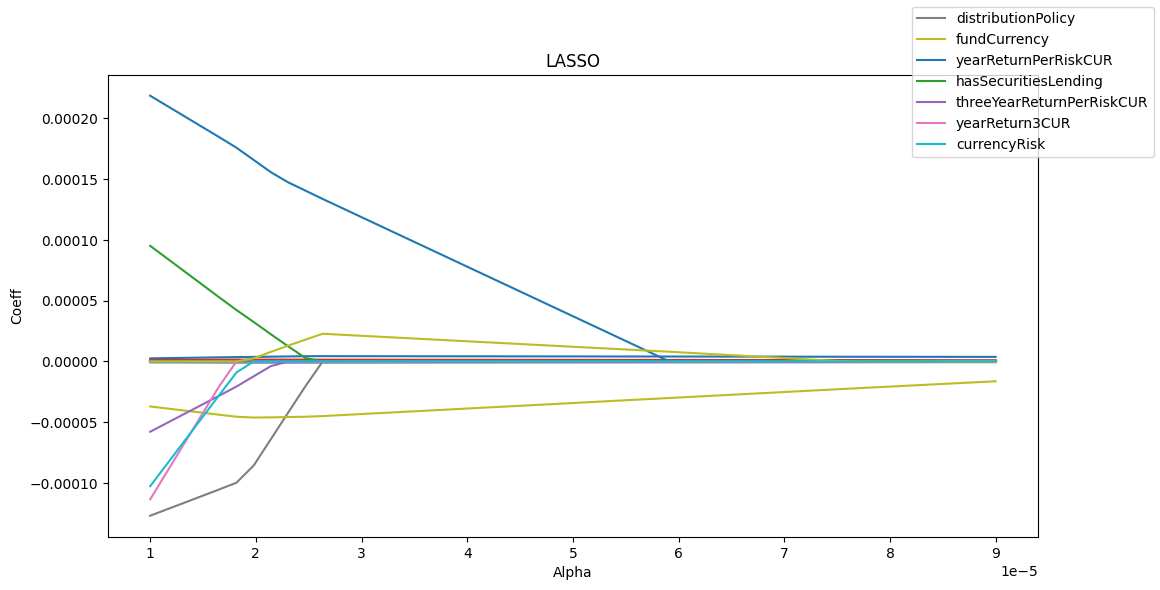

In [120]:
# Tolerance for smallest displayed coeffs (at smallest alpha)
tol = 3e-05

fig,ax = plt.subplots(figsize=(12,6));
for i in range(0,20):
  if abs(coeffs[i,0]) > tol:
    label_i = etfs_trim.columns[i];
  else:
    label_i = None
  ax.plot(alphas,coeffs[i,:], label = label_i)
  
ax.set_title("LASSO");
ax.set_xlabel("Alpha");
ax.set_ylabel("Coeff");
fig.legend();

So we see that `distributionPolicy`, `fundCurrency`, `yearReturnPerRiskCUR`, `hasSecuritiesLending`, `threeYearReturnPerRiskCUR`, `yearReturn3CUR`, and `currencyRisk` are not selected out.

We try a linear regression model with just these features.

In [125]:
LASSO_features = abs(coeffs[:,0])>3e-05
etfsLASSO_train = etfsInterp_train.loc[:,LASSO_features]
etfsLASSO_test = etfsInterp_test.loc[:,LASSO_features]

In [126]:
etfsLASSO_linear = linear_model.LinearRegression()
etfsLASSO_linear.fit(etfsLASSO_train, ter_train)
print(etfsLASSO_linear.coef_)

[-1.79284357e-04 -3.11773195e-05  2.54459447e-04  1.60228351e-04
 -1.51042179e-04 -2.24000540e-04 -1.85888059e-04]


In [129]:
# Train MSE
np.sum(((etfsLASSO_linear.predict(etfsLASSO_train)-ter_train).values)**2)

0.016340581207195122

In [130]:
# Test MSE
np.sum(((etfsLASSO_linear.predict(etfsLASSO_test)-ter_test).values)**2)

0.00582035391826535

With the simpler and more interpretable LASSO selected model, we have slightly improved predictive ability (test MSE).

### Sequential Feature Selection

We also try forward feature selection, which in some sense approachs the model from the opposite direction of LASSO. 

Here we also use a ridge model instead, as we manual add in features.

We select up to the same number of features as the LASSO model.

Again we use the `sklearn` library to implement this.



In [138]:
from sklearn.feature_selection import SequentialFeatureSelector
etfsFS_forward = SequentialFeatureSelector(etfs_linear, n_features_to_select=7, direction="forward")
etfsFS_forward.fit(etfsInterp_train,ter_train)
etfsInterp_train.columns[etfsFS_forward.get_support()]

Index(['quote', 'yearVolatilityCUR', 'distributionPolicy',
       'yearReturnPerRiskCUR', 'threeYearReturnPerRiskCUR',
       'threeYearReturnCUR', 'distributionFrequency'],
      dtype='object')

Features Selected: `quote`, `yearVolatilityCUR`, `distributionPolicy`,
       `yearReturnPerRiskCUR`, `threeYearReturnPerRiskCUR`,
       `threeYearReturnCUR`, and `distributionFrequency`.

The differing features versus LASSO: `quote`, `yearVolatilityCUR`, `threeYearReturnCUR`, and `distributionFrequency`.


In [140]:
etfs_forward=linear_model.LinearRegression()
etfs_forward.fit(etfsFS_forward.transform(etfsInterp_train),ter_train)
etfs_forward.coef_

array([-3.12768271e-07, -3.62857552e-04, -3.41578018e-04,  2.68229661e-04,
       -1.61875118e-04,  3.76208240e-05, -6.90576677e-05])

In [141]:
# Train MSE
np.sum(((etfs_forward.predict(etfsFS_forward.transform(etfsInterp_train))-ter_train).values)**2)

0.016360983110655928

In [143]:
# Test MSE
np.sum(((etfs_forward.predict(etfsFS_forward.transform(etfsInterp_test))-ter_test).values)**2)

0.005840248029951891

Forward selection predictive ability (test MSE) is better than the unfiltered model, but worse than the LASSO selected model.

## Tree Based Feature Selection

Using `sklearn` library.

In [146]:
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

In [148]:
etfs_Tree = tree.DecisionTreeRegressor()
etfs_Tree.fit(etfsInterp_train,ter_train)

DecisionTreeRegressor()

In [149]:
# Train MSE
np.sum(((etfs_Tree.predict(etfsInterp_train)-ter_train).values)**2)

5.254459748175625e-36

In [151]:
# Test MSE
np.sum(((etfs_Tree.predict(etfsInterp_test)-ter_test).values)**2)

0.01108227

We see the test error follows the usual trend of being worse than the training error.

Predicitive performace is significantly worse than the linear models intially.

Text(0.5, 1.0, 'Feature Importance using Tree Selection')

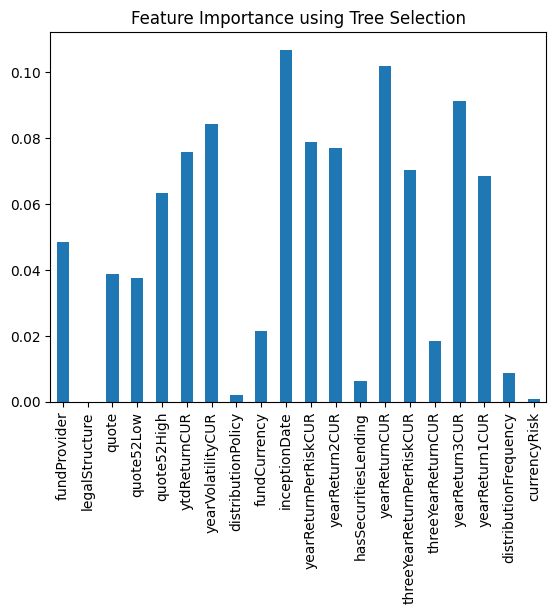

In [162]:
etf_importances = pd.Series(etfs_Tree.feature_importances_, index=etfsInterp_train.columns)
fig, ax = plt.subplots()
etf_importances.plot.bar(ax=ax);
ax.set_title("Feature Importance using Tree Selection")

In [166]:
etfs_features = etfs_Tree.feature_importances_
etfs_features.sort()
tol = etfs_features[len(etfs_features)-1-7]
etfsInterp_train.columns[etfs_Tree.feature_importances_>tol]

Index(['ytdReturnCUR', 'yearVolatilityCUR', 'inceptionDate',
       'yearReturnPerRiskCUR', 'yearReturn2CUR', 'yearReturnCUR',
       'yearReturn3CUR'],
      dtype='object')

The 7 important features based on the tree model are: `ytdReturnCUR`, `yearVolatilityCUR`, `inceptionDate`, `yearReturnPerRiskCUR`
       `yearReturn2CUR`, `yearReturnCUR`,
        `yearReturn3CUR`.

The features not selected from the LASSO and Sequential Selection for linear models are: `ytdReturnCUR`, `inceptionDate`, `yearReturn2CUR`, `yearReturnCUR`.

The only features occuring in all 3 forms of feature selection is `yearReturnPerRiskCUR`.

We fit a tree model using just the top 7 features:

In [167]:
etfsFS_Tree = tree.DecisionTreeRegressor()
etfsFS_Tree.fit(etfsInterp_train.loc[:,etfs_Tree.feature_importances_>tol],ter_train)

DecisionTreeRegressor()

In [168]:
# Train MSE
np.sum(((etfsFS_Tree.predict(etfsInterp_train.loc[:,etfs_Tree.feature_importances_>tol])-ter_train).values)**2)

4.0907203408615605e-36

In [169]:
# Test MSE
np.sum(((etfsFS_Tree.predict(etfsInterp_test.loc[:,etfs_Tree.feature_importances_>tol])-ter_test).values)**2)

0.009482820000000001

This improved the predictive performance of the Tree model!